In [1]:
import numpy as np
import fiducial as fid
import matplotlib.pyplot as plt
import utils as u
import Eg_cov as egcov
import joint_cov as jp
import pyccl.nl_pt as pt

Get linear scale cuts (only considering nonlinear matter effects, no nonlinear galaxy bias).

Set up parameters etc

In [33]:
lens = 'DESI'
src = 'LSST'
Pimax=900.

endfilename='test_Upgm_zPi_issues'

# Use the same cosmological parameters as Shadab's simulations:
h=0.69
OmB = 0.022/h**2

b1 = 2.33
#b2 = 0.9*(b1-1.0)**2-0.5 # From Fast-PT example notebook which says 
#'(this is a numerical fit to simulation k2Pnl1_regdata, but a relationship of this form is motivated in the spherical collapse picture'
#bs = -4.0/7.0*(b1-1.0) # The 'coevolution value' see Pandey et al. DES Y3 papers

# A_s designed to match sigma8 with other cosmological parameters
params = {'mu_0': 0., 'sigma_0':0., 'OmB':OmB, 'h':h, 'n_s':0.965, 'sigma8':0.82,'b':b1, 'OmM': 0.292, 'A_s':2.115 * 10**(-9)} 

#Nsamps=100000


In [34]:
rp0 = 1.5

rp_bin_c_raw = np.loadtxt('../data_for_Danielle/test-HOD-PB00-z0.75-w1pz_cat-zRSD-model-5-gxm-sel-crossparticles-wtag-w1-rfact10-bin1-wp-logrp-pi-NJN-100.txt.upsilon')[:,0]
rp_bin_edges_raw = u.rp_bin_edges_log(rp_bin_c_raw)
#Cut below rp0 making sure rp0 is in the lowest bin. Go one bin lower because this 
ind = next(j[0] for j in enumerate(rp_bin_edges_raw) if j[1]>rp0)-1
rp_bin_c = rp_bin_c_raw[ind:]
rp_bin_edges = rp_bin_edges_raw[ind:]

print('rp bin c=', rp_bin_c)
print('rp bin edges=', rp_bin_edges)


rp bin c= [ 1.39357881  1.83709466  2.42176242  3.19250463  4.20854074  5.54793718  7.31360558  9.64120984 12.70958983 16.75450244 22.08673575 29.11598823 38.38234769 50.59778848 66.70087562 87.92887875]
rp bin edges= [  1.21375641   1.60004256   2.10926689   2.78055529   3.66548575   4.83205129   6.36988417   8.39714273  11.06958999  14.5925616   19.23674266  25.35896564  33.42962733  44.0688315   58.09403408  76.5828519  100.95586057]


Get data covariance matrices for E_G and the joint probes case.

In [35]:
#Dcov_jp = jp.get_joint_covariance(params, lens, src, rp_bin_edges, rp_bin_c, rp0, endfilename)
#np.savetxt('/home/danielle/Documents/CMU/Research/EG_comparison/txtfiles/Dcov_jp_'+endfilename+'.txt', Dcov_jp)
#Dcov_jp = np.loadtxt('../txtfiles/sims_cov_myunits_wSN_Jan25_LSSTY10.dat')

In [36]:
#Nsamps = 10000
#Dcov_eg = egcov.get_egcov(Dcov_jp, params, rp_bin_edges, rp_bin_c, rp0, lens, src, Pimax, Nsamps, endfilename,)
#np.savetxt('../txtfiles/sims_egcov_myunits_wSN_Jan25_LSSTY10.txt', Dcov_eg)
#Dcov_eg = np.loadtxt('../txtfiles/sims_egcov_myunits_wSN_Jan25_LSSTY10.txt')

Get the linear and nonlinear datavector for E_G

In [37]:
# Get linear datavector
data_lin_EG = fid.E_G(params, rp_bin_edges, rp0, lens, src, Pimax, endfilename, nonlin=False)
# Get nonlinear datavector
data_nl_EG = fid.E_G(params, rp_bin_edges, rp0, lens, src, Pimax, endfilename, nonlin=True, nl_bias=False)

getting Upgg
getting Upgm
maxchi= 6669.353003473356
getting Upgg
getting Upgm
maxchi= 6669.353003473356


In [25]:
# Save for comparison
#save_EG_lin = np.column_stack((rp_bin_c, data_lin_EG))
#np.savetxt('../txtfiles/EG_lin_Pimax=300.txt', save_EG_lin)

#save_EG_nl = np.column_stack((rp_bin_c, data_lin_EG))
#np.savetxt('../txtfiles/EG_nl_Pimax=300.txt', save_EG_nl)

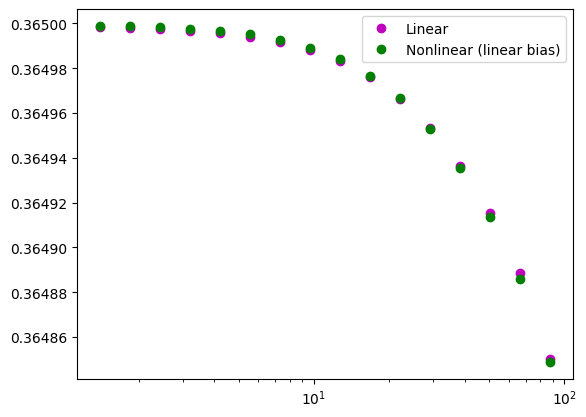

In [38]:
plt.figure()
plt.semilogx(rp_bin_c, data_lin_EG, 'mo', label='Linear')
plt.semilogx(rp_bin_c, data_nl_EG, 'go', label='Nonlinear (linear bias)')
plt.legend()
plt.show()

Get scale cuts for Eg

Now get the linear and nonlinear data vectors for the joint probes case

In [9]:
data_lin_jp = fid.jp_datavector(params, rp_bin_edges, rp0, lens,src, Pimax, endfilename, nonlin = False)
data_nl_jp = fid.jp_datavector(params, rp_bin_edges, rp0, lens,src, Pimax, endfilename, nonlin = True, nl_bias=False)

Pi_extent= 1500
maxchi= 6669.353003473356
Pi_extent= 1500
maxchi= 6669.353003473356


In [10]:
# Save for comparison:

save_Upgm_lin = np.column_stack((rp_bin_c, data_lin_jp[0:len(rp_bin_c)]))
np.savetxt('../txtfiles/Upgm_lin_Pimax=300.txt', save_Upgm_lin)

save_Upgm_nl = np.column_stack((rp_bin_c, data_nl_jp[0:len(rp_bin_c)]))
np.savetxt('../txtfiles/Upgm_nl_Pimax=300.txt', save_Upgm_nl)



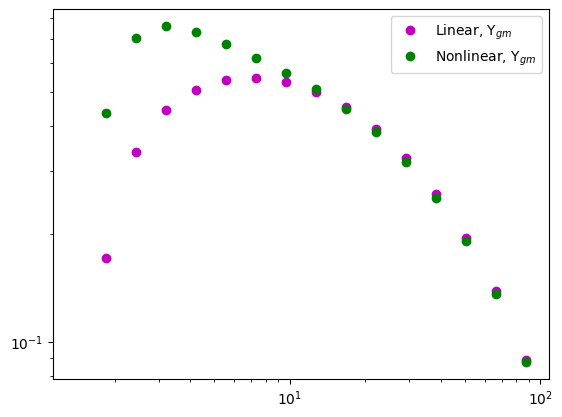

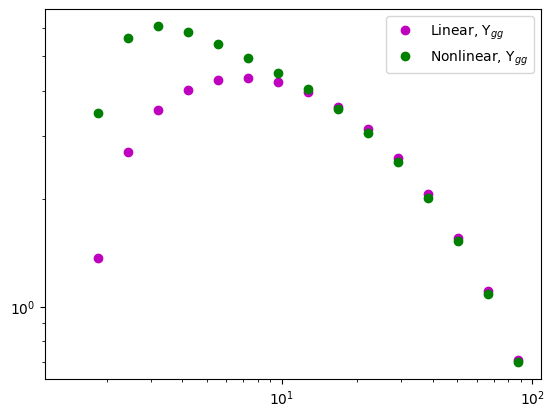

beta, lin= 0.34334818844012305
beta, nl= 0.34334818844012305


In [11]:
plt.figure()
plt.loglog(rp_bin_c, data_lin_jp[0:len(rp_bin_c)], 'mo', label='Linear, $\\Upsilon_{gm}$')
plt.loglog(rp_bin_c, data_nl_jp[0:len(rp_bin_c)], 'go', label='Nonlinear, $\\Upsilon_{gm}$')
plt.legend()
plt.show()

plt.figure()
plt.loglog(rp_bin_c, data_lin_jp[len(rp_bin_c):2*len(rp_bin_c)], 'mo', label='Linear, $\\Upsilon_{gg}$')
plt.loglog(rp_bin_c, data_nl_jp[len(rp_bin_c):2*len(rp_bin_c)], 'go', label='Nonlinear, $\\Upsilon_{gg}$')
plt.legend()
plt.show()

# Check that beta is the same in the linear or nonlinear case
print("beta, lin=", data_lin_jp[-1])
print("beta, nl=", data_nl_jp[-1])

In [12]:
# Now load all the text files and see how things differ:

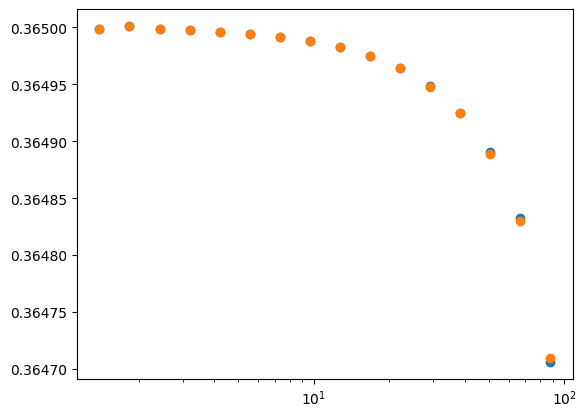

In [13]:
# EG_lin

rp_c, EG_lin_Pi_from_lenses = np.loadtxt('../txtfiles/EG_lin_Pi_from_lenses.txt', unpack=True)
rp_c, EG_lin_Pimax300 = np.loadtxt('../txtfiles/EG_lin_Pimax=300.txt', unpack=True)

plt.figure()
plt.semilogx(rp_c, EG_lin_Pi_from_lenses, 'o', label='fixed')
plt.semilogx(rp_c, EG_lin_Pimax300, 'o', label='wrong')
plt.show()

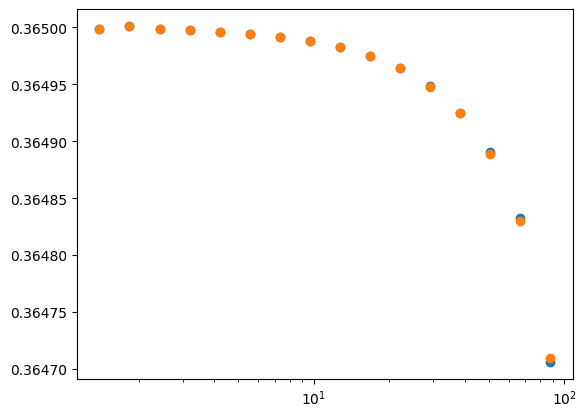

In [14]:
# EG nonlin:

rp_c, EG_nl_fixed = np.loadtxt('../txtfiles/EG_nl_Pi_from_lenses.txt', unpack=True)
rp_c, EG_nl_wrong = np.loadtxt('../txtfiles/EG_nl_Pimax=300.txt', unpack=True)

plt.figure()
plt.semilogx(rp_c, EG_nl_fixed, 'o', label='fromlenses')
plt.semilogx(rp_c, EG_nl_wrong, 'o', label='300')
plt.show()

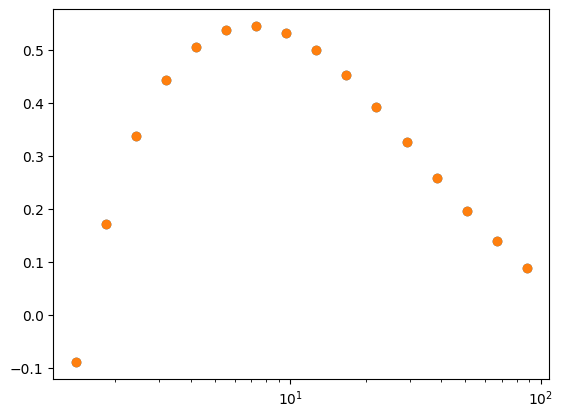

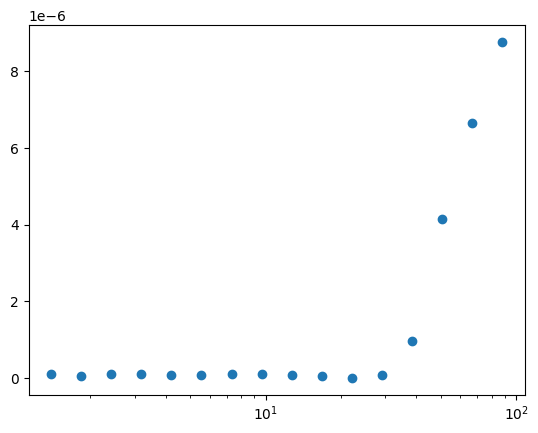

In [15]:
# Upgm only, lin

rp_c, Upgm_lin_fixed = np.loadtxt('../txtfiles/Upgm_lin_Pi_from_lenses.txt', unpack=True)
rp_c, Upgm_lin_wrong = np.loadtxt('../txtfiles/Upgm_lin_Pimax=300.txt', unpack=True)

plt.figure()
plt.semilogx(rp_c, Upgm_lin_fixed, 'o', label='fixed')
plt.semilogx(rp_c, Upgm_lin_wrong, 'o', label='wrong')
plt.show()

plt.figure()
plt.semilogx(rp_c, np.abs(Upgm_lin_fixed - Upgm_lin_wrong) / np.abs(Upgm_lin_fixed), 'o', label='fixed')
#plt.semilogx(rp_c, Upgm_lin_wrong, 'o', label='wrong')
plt.show()

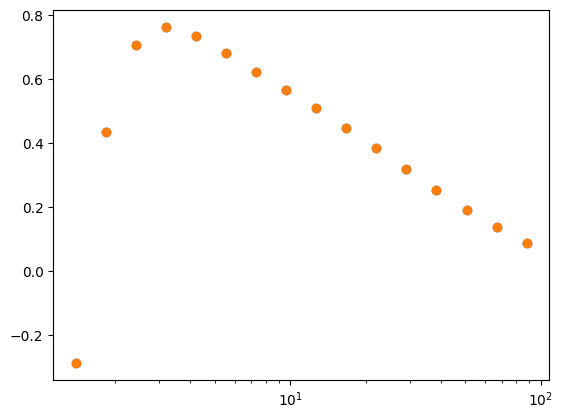

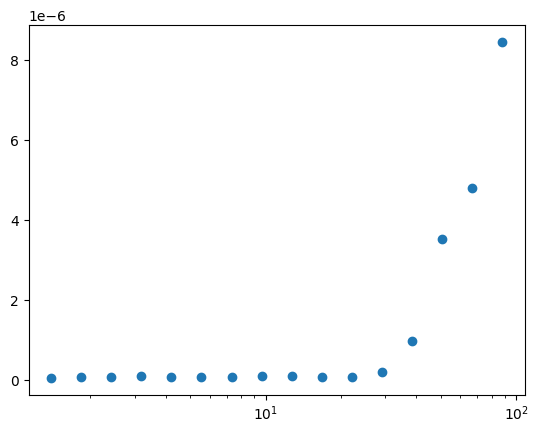

In [16]:
# Upgm only, lin

rp_c, Upgm_nl_fixed = np.loadtxt('../txtfiles/Upgm_nl_Pi_from_lenses.txt', unpack=True)
rp_c, Upgm_nl_wrong = np.loadtxt('../txtfiles/Upgm_nl_Pimax=300.txt', unpack=True)

plt.figure()
plt.semilogx(rp_c, Upgm_nl_fixed, 'o', label='fixed')
plt.semilogx(rp_c, Upgm_nl_wrong, 'o', label='wrong')
plt.show()

plt.figure()
plt.semilogx(rp_c, np.abs(Upgm_nl_fixed - Upgm_nl_wrong) / np.abs(Upgm_nl_fixed), 'o', label='fixed')
#plt.semilogx(rp_c, Upgm_lin_wrong, 'o', label='wrong')
plt.show()

So the difference is tiny but probably best to re-run